# Fetch Data

In [17]:
from google.colab import files

upload = files.upload()

Saving imageFolder.zip to imageFolder (1).zip


In [0]:
import zipfile

In [0]:
from shutil import rmtree

rmtree('/tmp/Images')

In [0]:
loc = '/content/imageFolder (1).zip'
zipref = zipfile.ZipFile(loc, 'r')
zipref.extractall('/tmp/Images')

In [0]:
zipref.close()

#Create Folders to Save Images

In [22]:
import os

print(os.path.getsize('/tmp/Images/imageFolder'))
print(os.path.getsize('/tmp/Images/imageFolder/1'))
print(os.path.getsize('/tmp/Images/imageFolder/2'))

4096
4096
4096


In [0]:
os.mkdir('/tmp/Images/Train')
os.mkdir('/tmp/Images/Train/1')
os.mkdir('/tmp/Images/Train/2')

os.mkdir('/tmp/Images/Validation')
os.mkdir('/tmp/Images/Validation/1')
os.mkdir('/tmp/Images/Validation/2')


#Preprocess Images

In [0]:
import cv2

def contrast_enhance(source_dir, dest_dir):
  img_read = cv2.imread(source_dir, 0)
  equ = cv2.equalizeHist(img_read)
  write_file(dest_dir, equ)
  
def write_file(dest_dir, eq_img):
  cv2.imwrite(dest_dir, eq_img)
  



In [0]:
from shutil import copyfile
import random



def copyfunc(source, train, test, split):
  file = []
  for fname in os.listdir(source):
    size = os.path.getsize(source + fname)
    if size > 0:
      file.append(fname)
    else:
      print(fname + "has zero size, so ignoring!")
      
  file = random.sample(file, len(file))
  index = int(len(file)*split)
  
  train_files = file[:index]
  test_files = file[index:]
  
  for fname in train_files:
    source_dir = source + fname
    dest_dir = train + fname
    contrast_enhance(source_dir, dest_dir)
    
  for fname in test_files:
    source_dir = source + fname
    dest_dir = test + fname
    contrast_enhance(source_dir, dest_dir)
    
    

source1 = '/tmp/Images/imageFolder/1/'
source2 = '/tmp/Images/imageFolder/2/'

train1 = '/tmp/Images/Train/1/'
train2 = '/tmp/Images/Train/2/'

test1 = '/tmp/Images/Validation/1/'
test2 = '/tmp/Images/Validation/2/'


copyfunc(source1, train1, test1, 0.8)
copyfunc(source2, train2, test2, 0.8)
    

In [26]:
print("1: ", len(os.listdir('/tmp/Images/imageFolder/1/')))
print("2: ", len(os.listdir('/tmp/Images/imageFolder/2/')))

print(len(os.listdir('/tmp/Images/Train/1')))
print(len(os.listdir('/tmp/Images/Train/2')))

print(len(os.listdir('/tmp/Images/Validation/1')))
print(len(os.listdir('/tmp/Images/Validation/2')))

1:  55
2:  54
44
43
11
11


# Prepare DataGenerator

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_gen = ImageDataGenerator(rescale = 1. / 255.0,
                              rotation_range = 90,
                              horizontal_flip = True,
                              zoom_range = 0.2,
                              width_shift_range = 0.2,
                              height_shift_range =0.2)

validation_gen = ImageDataGenerator(rescale = 1. / 255.0,
                              rotation_range = 90,
                              horizontal_flip = True,
                              zoom_range = 0.2,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2)

train_dir = '/tmp/Images/Train'
validation_dir ='/tmp/Images/Validation'

train_datagen = train_gen.flow_from_directory(train_dir,
                                             target_size = (300, 300),
                                              class_mode = 'binary',
                                              batch_size = 4
                                             )

validation_datagen = validation_gen.flow_from_directory(validation_dir,
                                             target_size = (300, 300),
                                              class_mode = 'binary',
                                              batch_size = 4
                                             )



Found 87 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


#Define custom CNN model

In [58]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Flatten(input_shape = (300, 300, 3)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 270000)            0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               34560128  
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 34,561,169
Trainable params: 34,561,169
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [60]:
history = model.fit_generator(
    train_datagen,
    epochs = 50,
    validation_data = validation_datagen,
    verbose = 1
)

Epoch 1/50
22/22 [==============================] - 6s 295ms/step - loss: 10.3963 - acc: 0.5517 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/50
22/22 [==============================] - 5s 223ms/step - loss: 0.7303 - acc: 0.5057 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/50
15/22 [===================>..........] - ETA: 1s - loss: 0.6936 - acc: 0.4667

KeyboardInterrupt: ignored

#Display metrics

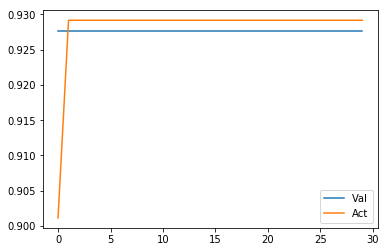

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history['val_acc'], label = 'Val')
plt.plot(history.epoch, history.history['acc'], label = 'Act')
plt.legend()
plt.show()

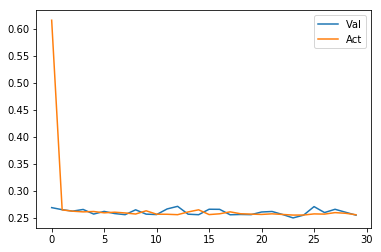

In [20]:
plt.plot(history.epoch, history.history['val_loss'], label = 'Val')
plt.plot(history.epoch, history.history['loss'], label = 'Act')
plt.legend()
plt.show()

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

yhat = model.predict_generator(train_datagen)


In [0]:
cm = confusion_matrix(train_datagen.labels, yhat_)


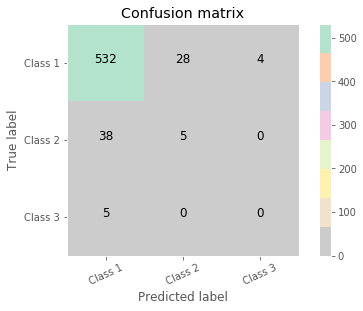

In [0]:

import itertools
plt.style.use('ggplot')
plt.imshow(cm,interpolation ='nearest', cmap = plt.cm.Pastel2_r)
plt.colorbar()
plt.text
plt.xticks([0, 1], ['Class 1', 'Class 2'], rotation =25)
plt.yticks([0, 1], ['Class 1', 'Class 2'])
plt.grid(None)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, cm[i, j],
  horizontalalignment="center",
  color="black",
  fontsize = 12)

plt.show()

#Transfer Learning Through InceptionV3

In [0]:
from tensorflow.keras.applications import InceptionV3


!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


pretrained_network = InceptionV3(
    input_shape = (256, 256, 3),
    include_top = False,
    weights = None
)

pretrained_network.load_weights(local_weights_file)

for layer in pretrained_network.layers:
  layer.trainable = False
  
last_layer = pretrained_network.get_layer('mixed7')
last_output = last_layer.output
last_layer.output_shape


--2019-07-22 09:13:32--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  81.0MB/s    in 1.0s    

2019-07-22 09:13:33 (81.0 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



(None, 14, 14, 768)

In [0]:
pretrained_network.summary()

In [0]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, BatchNormalization



In [0]:
x = Flatten()(last_output)
x = Dropout(0.2)(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(1)(x)
x = Activation('sigmoid')(x)

model = Model(pretrained_network.input, x)

model.summary()

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
callback1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=0)
callback2 = tf.keras.callbacks.ModelCheckpoint(filepath = 'model_best.hdf5',
                                              save_best_only = True,
                                              verbose = 1,
                                              monitor = 'acc')

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc')>=0.99:
      print("\n", "Ending Training as reached 99% accuracy!")
      self.model.stop_training = True

history = model.fit_generator(
    train_datagen,
    epochs = 30,
    steps_per_epoch = 10,
    validation_data = validation_datagen,
    verbose = 1, 
    callbacks = [callback1, callback2, myCallback()]
)

Epoch 1/30
 9/10 [==========================>...] - ETA: 11s - loss: 0.5882 - acc: 0.7330
Epoch 00001: acc improved from -inf to 0.74794, saving model to model_best.hdf5
10/10 [==============================] - 231s 23s/step - loss: 0.5669 - acc: 0.7479 - val_loss: 4.7184 - val_acc: 0.1776
Epoch 2/30
 9/10 [==========================>...] - ETA: 10s - loss: 0.2824 - acc: 0.9171
Epoch 00002: acc improved from 0.74794 to 0.91598, saving model to model_best.hdf5
10/10 [==============================] - 139s 14s/step - loss: 0.2834 - acc: 0.9160 - val_loss: 3.2446 - val_acc: 0.1053
Epoch 3/30
 9/10 [==========================>...] - ETA: 10s - loss: 0.2412 - acc: 0.9227
Epoch 00003: acc improved from 0.91598 to 0.92422, saving model to model_best.hdf5
10/10 [==============================] - 139s 14s/step - loss: 0.2399 - acc: 0.9242 - val_loss: 1.7285 - val_acc: 0.3553
Epoch 4/30
 9/10 [==========================>...] - ETA: 10s - loss: 0.2395 - acc: 0.9300
Epoch 00004: acc improved from 

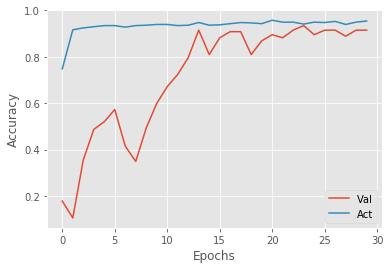

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history['val_acc'], label = 'Val')
plt.plot(history.epoch, history.history['acc'], label = 'Act')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

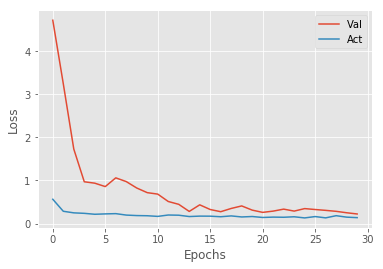

In [0]:
plt.plot(history.epoch, history.history['val_loss'], label = 'Val')
plt.plot(history.epoch, history.history['loss'], label = 'Act')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = []

#for i in range(10):
yhat = model.predict_generator(train_datagen, steps = 10)
yhat_ = yhat.argmax(axis=1)
cm.append(confusion_matrix(train_datagen.labels, yhat_))

In [0]:
cm=cm[0]

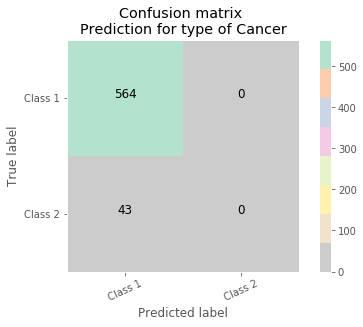

In [0]:
import itertools
plt.style.use('ggplot')
plt.imshow(cm,interpolation ='nearest', cmap = plt.cm.Pastel2_r)
plt.colorbar()
plt.text
plt.xticks([0, 1], ['Class 1', 'Class 2'], rotation =25)
plt.yticks([0, 1], ['Class 1', 'Class 2'])
plt.grid(None)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix \nPrediction for type of Cancer')

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, cm[i, j],
  horizontalalignment="center",
  color="black",
  fontsize = 12)

plt.show()

In [0]:
import os
os.path.getsize('/content/weights.07-0.54.hdf5')/(1024*1024)

475.8960876464844

#Tuned InceptionV3

In [0]:
pretrained_network.trainable = False

layer_s = pretrained_network.get_layer('mixed7')

for layer in pretrained_network.layers[200:228]:
  layer.trainable = True


In [0]:

model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

summ = model.summary()

In [0]:
callback1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 7, verbose = 0)
callback2 = tf.keras.callbacks.ModelCheckpoint(filepath = 'model_tuned.hdf5',
                                              monitor = 'acc',
                                              save_best_only = True,
                                              verbose = 1)


history = model.fit_generator(
    train_datagen,
    epochs = 30,
    validation_data = validation_datagen,
    verbose = 1, 
    callbacks = [callback1, callback2, myCallback()]
)

Epoch 1/30
 9/10 [==========================>...] - ETA: 16s - loss: 0.2000 - acc: 0.9271
Epoch 00001: acc improved from -inf to 0.92257, saving model to model_tuned.hdf5
10/10 [==============================] - 201s 20s/step - loss: 0.2459 - acc: 0.9226 - val_loss: 1.0344 - val_acc: 0.9276
Epoch 2/30
 1/10 [==>...........................] - ETA: 2:07 - loss: 0.2234 - acc: 0.9219

KeyboardInterrupt: ignored

In [0]:
model1.evaluate_generator(train_datagen)

[0.2747507614426707, 0.94233936]

In [0]:
from sklearn.metrics import roc_curve

y_score = yhat[:,0]
fpr, tpr, _ = roc_curve(train_datagen.labels, y_score)

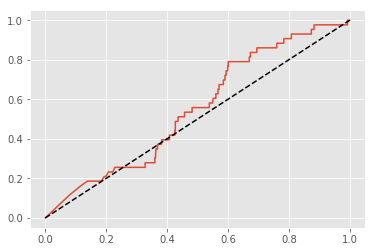

In [0]:
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], 'k--')

#Transfer Learning through ResNet

In [0]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Activation, BatchNormalization, Dropout

In [0]:
pretrained_model = ResNet50(input_shape = (256, 256, 3),
                           include_top = False,
                           weights = 'imagenet')

pretrained_model.trainable = False

pretrained_model.summary()

In [0]:
x = Flatten()(pretrained_model.output)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2, seed = 1234)(x)
x = Dense(1)(x)
x = Activation('sigmoid')(x)

model = Model(pretrained_model.input, x)

model.summary()

In [0]:
opt = tf.keras.optimizers.RMSprop(lr = 1e-2)

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [0]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, verbose = 0) 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor = 0.2,
                              patience = 5, min_lr = 0.0001)
model_checkpt = tf.keras.callbacks.ModelCheckpoint(monitor = 'acc', save_best_only = True, 
                                                   filepath = 'Model_best.hdf5',
                                                   verbose = 1)

class early_end(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc')>=0.99:
      print("\n", "Ending Training as reached 99% accuracy!")
      self.model.stop_training = True

In [0]:
history = model.fit_generator(
    train_datagen,
    validation_data = validation_datagen,
    epochs = 20,
    steps_per_epoch = 10,
    callbacks = [early_stop, early_end(), model_checkpt, reduce_lr],
    verbose = 1
)

Epoch 1/20
 9/10 [==========================>...] - ETA: 20s - loss: 0.4043 - acc: 0.8398
Epoch 00001: acc improved from -inf to 0.84514, saving model to Model_best.hdf5
10/10 [==============================] - 268s 27s/step - loss: 0.4044 - acc: 0.8451 - val_loss: 0.2542 - val_acc: 0.9276
Epoch 2/20
 9/10 [==========================>...] - ETA: 19s - loss: 0.2583 - acc: 0.9245
Epoch 00002: acc improved from 0.84514 to 0.92586, saving model to Model_best.hdf5
10/10 [==============================] - 245s 24s/step - loss: 0.2538 - acc: 0.9259 - val_loss: 0.3077 - val_acc: 0.9276
Epoch 3/20
 9/10 [==========================>...] - ETA: 19s - loss: 0.1991 - acc: 0.9429
Epoch 00003: acc improved from 0.92586 to 0.93245, saving model to Model_best.hdf5
10/10 [==============================] - 246s 25s/step - loss: 0.2213 - acc: 0.9325 - val_loss: 0.2705 - val_acc: 0.9276
Epoch 4/20
 9/10 [==========================>...] - ETA: 19s - loss: 0.2044 - acc: 0.9282
Epoch 00004: acc did not improv

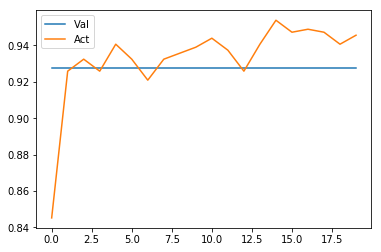

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history['val_acc'], label = 'Val')
plt.plot(history.epoch, history.history['acc'], label = 'Act')
plt.legend()
plt.show()

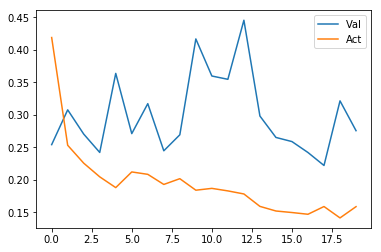

In [0]:

plt.plot(history.epoch, history.history['val_loss'], label = 'Val')
plt.plot(history.epoch, history.history['loss'], label = 'Act')
plt.legend()
plt.show()

In [0]:
ypred = model.predict_generator(train_datagen)
ypred = ypred.argmax(axis = 1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_datagen.labels, ypred)

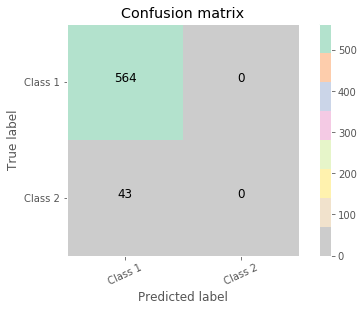

In [0]:
import itertools
plt.style.use('ggplot')
plt.imshow(cm,interpolation ='nearest', cmap = plt.cm.Pastel2_r)
plt.colorbar()
plt.text
plt.xticks([0, 1], ['Class 1', 'Class 2'], rotation =25)
plt.yticks([0, 1], ['Class 1', 'Class 2'])
plt.grid(None)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, cm[i, j],
  horizontalalignment="center",
  color="black",
  fontsize = 12)

plt.show()

In [0]:
model_best = tf.keras.models.load_model('Model_best.hdf5')

W0723 11:08:15.341255 140184452872064 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0723 11:08:15.345987 140184452872064 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0723 11:08:15.461582 140184452872064 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecat

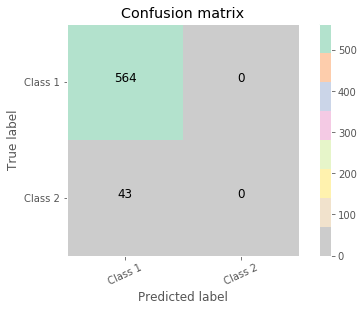

In [0]:
ypred = model_best.predict_generator(train_datagen)
ypred = ypred.argmax(axis = 1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_datagen.labels, ypred)

import itertools
plt.style.use('ggplot')
plt.imshow(cm,interpolation ='nearest', cmap = plt.cm.Pastel2_r)
plt.colorbar()
plt.text
plt.xticks([0, 1], ['Class 1', 'Class 2'], rotation =25)
plt.yticks([0, 1], ['Class 1', 'Class 2'])
plt.grid(None)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, cm[i, j],
  horizontalalignment="center",
  color="black",
  fontsize = 12)

plt.show()

#ResNet50 Tuned

In [0]:
pretrained_model.trainable = True

In [0]:
len(pretrained_model.layers)

175

In [0]:
for layer in pretrained_model.layers[:151]:
  layer.trainable = False

In [0]:

opt = tf.keras.optimizers.RMSprop(lr = 1e-4)

model_best.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

model_best.summary()

In [0]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, verbose = 0) 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor = 0.2,
                              patience = 5, min_lr = 1e-6)
model_checkpt = tf.keras.callbacks.ModelCheckpoint(monitor = 'acc', save_best_only = True, 
                                                   filepath = 'Model_best_tuned.hdf5',
                                                   verbose = 1)

class early_end(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc')>=0.99:
      print("\n", "Ending Training as reached 99% accuracy!")
      self.model.stop_training = True

In [0]:
history = model_best.fit_generator(
    train_datagen,
    validation_data = validation_datagen,
    epochs = 20 + 20,
    steps_per_epoch = 10,
    initial_epoch = 20,
    callbacks = [early_stop, early_end(), model_checkpt, reduce_lr],
    verbose = 1
)



Epoch 1/20
 9/10 [==========================>...] - ETA: 20s - loss: 0.1854 - acc: 0.9411
Epoch 00001: acc improved from 0.63921 to 0.94399, saving model to Model_best_tuned.hdf5
10/10 [==============================] - 287s 29s/step - loss: 0.1775 - acc: 0.9440 - val_loss: 0.3280 - val_acc: 0.9276
Epoch 2/20
 9/10 [==========================>...] - ETA: 19s - loss: 0.1549 - acc: 0.9613
Epoch 00002: acc improved from 0.94399 to 0.95387, saving model to Model_best_tuned.hdf5
10/10 [==============================] - 246s 25s/step - loss: 0.1591 - acc: 0.9539 - val_loss: 0.2456 - val_acc: 0.9276
Epoch 3/20
 9/10 [==========================>...] - ETA: 19s - loss: 0.1764 - acc: 0.9374
Epoch 00003: acc did not improve from 0.95387
10/10 [==============================] - 246s 25s/step - loss: 0.1740 - acc: 0.9390 - val_loss: 0.3034 - val_acc: 0.9276
Epoch 4/20
 9/10 [==========================>...] - ETA: 19s - loss: 0.1696 - acc: 0.9484
Epoch 00004: acc did not improve from 0.95387
10/10 [